In [128]:
# Getting all the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Uploading the data frame
data = pd.read_csv('files_for_lab/learningSet.csv')
print(data.shape)
data.head(3)

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(95412, 481)


,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,...,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,,,3712,0,,...,0.0,0,L,4,E,X,X,X,39.0,C
1,9401,BOA,1,CA,91326,,,5202,0,,...,0.0,0,L,2,G,X,X,X,1.0,A
2,9001,AMH,1,NC,27017,,,0,0,,...,0.0,1,L,4,E,X,X,X,60.0,C


### To split the columns

In [130]:
Y = data[['TARGET_B', 'TARGET_D']]
numerical = data.select_dtypes(np.number)
categorical = data.select_dtypes(object)

In [131]:
#Replace all white space for Nan values.
categorical = categorical.apply(lambda x: x.replace(" ", np.NaN))

# 1. Check for null values in all the columns
nulls_percent_df = pd.DataFrame(categorical.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']

# 2. Create a new empty
drop_list = ['OSOURCE','ZIP']

# 3. Identify columns that over 85% missing values
columns_drop = list(nulls_percent_df[nulls_percent_df['nulls_percentage']>0.85]['column_name'])

for column in drop_list:
    columns_drop.append(column)

# 4. Remove those columns from the dataframe
categorical = categorical.drop(columns_drop, axis=1)

# 5. Reduce the number of categories in the column GENDER

categorical['GENDER'] = categorical['GENDER'].fillna('F')

# Define a fuction to clean gender column.
def gender_clean(gender):
    if (gender == 'U') or (gender == 'J') or (gender == 'A') or (gender == 'C'):
        return 'other'
    else:
        return gender 

categorical['GENDER'] = list(map(gender_clean,categorical['GENDER']))

## 1. Check for null values in all the columns

In [132]:
nulls_percent_df = pd.DataFrame(numerical.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df.head(3)

,column_name,nulls_percentage
0,ODATEDW,0.0
1,TCODE,0.0
2,DOB,0.0


## 2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.

### 2.1 GEOCODE2 cleaning.

In [133]:
# It is categorical.
categorical['GEOCODE2'].value_counts(dropna=False)
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

### 2.2 WEALTH1 cleaning.

In [134]:
# There are too many nan values.
numerical['WEALTH1'].value_counts(dropna=False)

NaN    44732
9.0     7585
8.0     6793
7.0     6198
6.0     5825
5.0     5280
4.0     4810
3.0     4237
2.0     4085
1.0     3454
0.0     2413
Name: WEALTH1, dtype: int64

In [135]:
# To remove all numerical columns with nan values.
nulls_percent = pd.DataFrame((numerical.isna().sum()/len(numerical)).reset_index())
nulls_percent.columns = ['column','%nan']
columns_nan = list(nulls_percent[nulls_percent['%nan']!=0]['column'])
columns_nan.remove('WEALTH1')
numerical1 = numerical.drop(columns_nan,axis=1)

In [136]:
# We will take all raws with no nan values.
numericals_with_wealth = numerical1[numerical1['WEALTH1'].notna()]

In [137]:
#I will try KNN to predict wealth2:

y = numericals_with_wealth['WEALTH1']
X = numericals_with_wealth.drop(['WEALTH1'],axis=1) #I should also drop the real target

In [138]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [139]:
X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

In [140]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized,y)
KNN.score(X_normalized,y)

0.6648973954222573

In [141]:
# To predict the WEALTH1 again.
X = numerical1.drop(['WEALTH1'],axis=1)
X_normalized = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)

In [142]:
predicted_WEALTH1 = pd.Series(KNN.predict(X_normalized),name='predicted_WEALTH1')

In [143]:
numerical = pd.concat([numerical,predicted_WEALTH1],axis=1)

In [144]:
numerical['final_WEALTH1'] =  np.where(numerical['WEALTH1'].isna(), numerical['predicted_WEALTH1'], numerical['WEALTH1'])

In [145]:
numerical = numerical.drop(['predicted_WEALTH1'],axis=1)

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


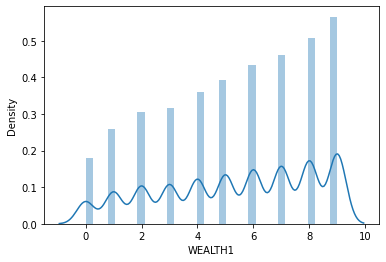

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


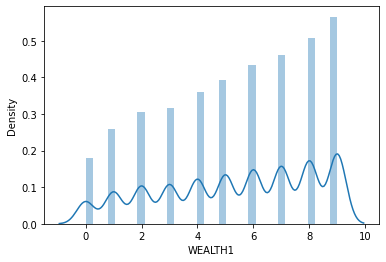

/usr/local/Cellar/jupyterlab/3.0.9/libexec/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


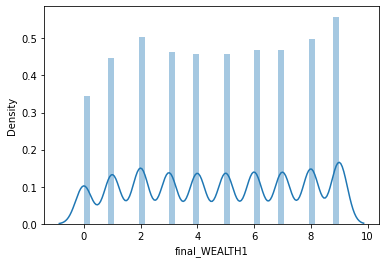

In [146]:
plt.show(sns.distplot(numerical[numerical['WEALTH1'].isna()== False]['WEALTH1']))
plt.show(sns.distplot(numerical['WEALTH1']))
plt.show(sns.distplot(numerical['final_WEALTH1']))

### 2.2 ADI cleaning.

In [151]:
display(numerical['ADI'].value_counts(dropna=False))
numerical['ADI'] = numerical['ADI'].fillna(round(np.mean(numerical['CLUSTER2']),0))

13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
161.0       1
103.0       1
147.0       1
601.0       1
Name: ADI, Length: 205, dtype: int64

### 2.3 DMA cleaning.

In [152]:
display(numerical['DMA'].value_counts())
numerical['ADI'] = numerical['ADI'].fillna(round(np.median(numerical['ADI']),0))

803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
516.0       1
552.0       1
554.0       1
584.0       1
Name: DMA, Length: 206, dtype: int64

### 2.4 MSA cleaning.

In [149]:
display(numerical['MSA'].value_counts(dropna=False))
numerical['MSA'] = numerical['MSA'].fillna(0)

0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
2975.0        1
9140.0        1
9280.0        1
960.0         1
1320.0        1
Name: MSA, Length: 299, dtype: int64

### 2.5 numerical cleaning.

In [150]:
numerical.to_csv('numerical')
categorical.to_csv('categorical')
Y.to_csv('Y')